In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix,
    classification_report,
    roc_curve
)
import matplotlib.pyplot as plt

In [3]:
# ===== Imports =====
import pandas as pd
import numpy as np

# ===== Load Dataset =====
df = pd.read_csv("../data/raw/bank_marketing.csv", sep=",", engine="python")

# ===== Encode Target =====
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# ===== Split Features & Target =====
X = df.drop('deposit', axis=1)
y = df['deposit']

# ===== One-Hot Encoding =====
X = pd.get_dummies(X, drop_first=True)

# ===== Train-Test Split =====
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [4]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

c:\Users\vaish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression Performance
Accuracy: 0.8248992386923422
Precision: 0.8209817131857555
Recall: 0.8062381852551985
F1 Score: 0.8135431568907964
ROC-AUC: 0.903687406990307


In [6]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [7]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Performance
Accuracy: 0.8598298253470668
Precision: 0.8299379982285208
Recall: 0.8856332703213611
F1 Score: 0.8568815729309557
ROC-AUC: 0.9206572014640227


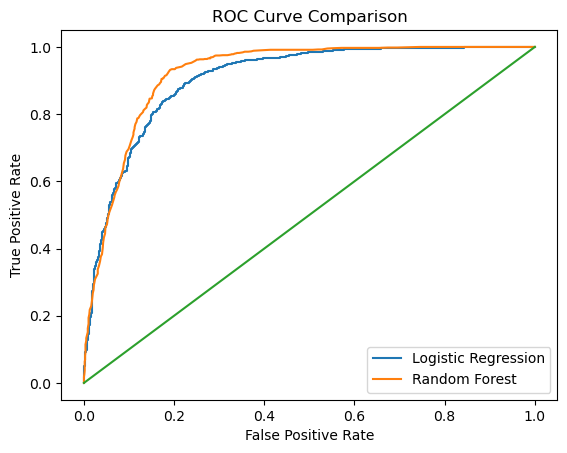

In [8]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [10]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)

duration            0.337902
balance             0.083896
age                 0.077881
day                 0.071932
campaign            0.036946
poutcome_success    0.036258
pdays               0.034531
contact_unknown     0.032653
housing_yes         0.026965
previous            0.020153
dtype: float64

# 📌 Period 3 – Model Building & Evaluation

## 🎯 Objective

The objective of this phase was to:

- Train machine learning models to predict lead conversion  
- Compare model performance  
- Evaluate classification metrics  
- Identify key features influencing customer conversion  

---

## 🤖 Models Implemented

We trained two classification models:

1. **Logistic Regression** – Baseline interpretable model  
2. **Random Forest Classifier** – Advanced ensemble model  

These models were selected to balance interpretability and performance.

---

## 📊 Logistic Regression

Logistic Regression serves as a strong baseline model for binary classification problems.

### Why Logistic Regression?

- Easy to interpret  
- Works well for linear relationships  
- Provides probability outputs  
- Widely used in marketing analytics  

### Evaluation Metrics Considered

- Accuracy  
- Precision  
- Recall  
- F1 Score  
- ROC-AUC Score  

---

## 🌲 Random Forest Classifier

Random Forest is an ensemble model that combines multiple decision trees.

### Why Random Forest?

- Captures non-linear patterns  
- Handles feature interactions automatically  
- More robust to overfitting  
- Provides feature importance scores  

---

## 📈 Model Evaluation Strategy

We evaluated both models using:

- **Accuracy** – Overall correctness  
- **Precision** – Correct positive predictions  
- **Recall** – Ability to capture actual converters  
- **F1 Score** – Balance between precision and recall  
- **ROC-AUC** – Overall classification performance  

The ROC curve was plotted to compare model discrimination ability.

---

## 🔍 Feature Importance Analysis

Using Random Forest, we extracted the most influential features impacting conversion probability.

This helps answer:

- What drives customer conversion?
- Which attributes influence marketing success?
- Where should marketing teams focus?

---

## 📌 Key Outcomes of Period 3

✔ Built two machine learning models  
✔ Compared model performance  
✔ Evaluated using multiple metrics  
✔ Visualized ROC curve  
✔ Identified top conversion-driving features  

---

## 💼 Business Interpretation

This phase enables the business to:

- Predict which leads are likely to convert  
- Improve marketing targeting  
- Optimize campaign budgets  
- Increase overall conversion rate  

---

## 🚀 Next Phase – Period 4

In the next phase, we will:

- Translate model results into business insights  
- Create visual dashboards  
- Identify drop-off opportunities  
- Provide actionable marketing recommendations  